In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df

,Unnamed: 0,index,iin,name_surname,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,...,Only_specialization_name,2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,0,1,1175243,ХАЙРУЛЛИНА ДИЛЬНАЗ ЕРБОЛАТОВНА,137,13,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,1,2,1174974,САДУОВА КАМИЛА ҒАНИҚЫЗЫ,134,302,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,2,3,1031724,ЕРБОЛАТОВА АКБОТА ТАЛГАТОВНА,127,13,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,3,4,1176230,КАШЕНОВА АЙГЕРИМ КАЙРАТОВНА,125,25,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,4,5,1171682,СЕРІКОВА АДИНА ЕРІКҚЫЗЫ,124,302,B001 - Педагогика и психология,City,89,непс,...,Педагогика и психология,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,27663,315,1078939,ҚАРЖАУ АЛТЫН ҒАЛЫМЖАНҚЫЗЫ,97,13,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27664,27664,316,1088447,ЕРДИМҰРАТ АҚНҰР,97,32,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27665,27665,317,1043063,АҚАБАЕВА КАРАҚАТ ЖЕҢІСҚЫЗЫ,97,42,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27666,27666,318,904262,ЕРКІНБЕК ЕРАСЫЛ АЙДОСҰЛЫ,97,27,B095 - Транспортные услуги,Village,97,мнс,...,Транспортные услуги,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0


In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'iin', 'name_surname', 'Points', 'Univer_code',
       'specialization_name', 'Status', 'суммабалловсертификата',
       'преимущественноеправо', 'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', 'Code',
       'Only_specialization_name', '2020-2021_Max', '2020-2021_Min',
       '2021-2022_Max', '2021-2022_Min', 'difference_Max', 'difference_Min',
       'profile subject_1', 'profile subject_2', 'Count_difference_per_year'],
      dtype='object')

In [5]:
df.drop(columns = ['Unnamed: 0', 'iin','name_surname', 'Code', 'Only_specialization_name'],inplace = True)

In [6]:
df.columns

Index(['index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year'],
      dtype='object')

In [7]:
type(df['Count_difference_per_year'][0])

numpy.float64

In [8]:
# Errors
# ДЖУМАХАН АЯУЛЫМ
# БАГИРОВ МЯХЯМАД
# ЗЕЙНЕЛЬГАБДИН МИРАС
# АБДРАХИМОВ НУРСУЛТАН
# ГУСЕЙНОВ МАГОМЕД
# АБАВ -БАКИРОВА

In [9]:
df['Points'][2460]

'АГА'

In [10]:
df['Points'][2460] = '106' #025
df['Univer_code'][2460] = '25'


df['Points'][9667] = '118' #421
df['Univer_code'][9667] = '421'

df['Points'][14043] = '86' #522
df['Univer_code'][14043] = '522'

df['Points'][20456] = '50' #053
df['Univer_code'][20456] = '53'

df['Points'][24461] = '68' #036
df['Univer_code'][24461] = '36'

df['Points'][24306] = '67' #036
df['Univer_code'][24306] = '45'
#67 045

C:\Users\fazyl\AppData\Local\Temp\ipykernel_7928\7510844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][2460] = '106' #025
C:\Users\fazyl\AppData\Local\Temp\ipykernel_7928\7510844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Univer_code'][2460] = '25'
C:\Users\fazyl\AppData\Local\Temp\ipykernel_7928\7510844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][9667] = '118' #421
C:\Users\fazyl\Ap

In [11]:
df['Univer_code'].value_counts()
for i in range(len(df)):
    if df['Univer_code'][i].isdigit():
        pass
    else:
        print(df['Univer_code'][i], i)

In [12]:
df.columns

Index(['index', 'Points', 'Univer_code', 'specialization_name', 'Status',
       'суммабалловсертификата', 'преимущественноеправо',
       'среднийбаллаттестата(диплома)',
       'суммабалловпрофильныхпредметов(творческихэкзаменов)', '2020-2021_Max',
       '2020-2021_Min', '2021-2022_Max', '2021-2022_Min', 'difference_Max',
       'difference_Min', 'profile subject_1', 'profile subject_2',
       'Count_difference_per_year'],
      dtype='object')

In [13]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,"4,571",46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0


In [14]:
type(df['2020-2021_Max'][0])

numpy.float64

In [15]:
df.fillna(0)
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
# replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#df = df.reset_index()

In [16]:
for i in range(len(df)):
    df['Points'][i] = int(float(df['Points'][i]))
    df['Univer_code'][i] = int(df['Univer_code'][i])
    df['среднийбаллаттестата(диплома)'][i] = float(df['среднийбаллаттестата(диплома)'][i].replace(',', '.'))
    
    df['2020-2021_Max'][i] = int(float(df['2020-2021_Max'][i]))
    df['2020-2021_Min'][i] = int(float(df['2020-2021_Min'][i]))
    
    df['2021-2022_Max'][i] = int(float(df['2021-2022_Max'][i]))
    df['2021-2022_Min'][i] = int(float(df['2021-2022_Min'][i]))
    
    df['difference_Max'][i] = int(float(df['difference_Max'][i]))
    df['difference_Min'][i] = int(float(df['difference_Min'][i]))
    
    #Count_difference_per_year
    df['Count_difference_per_year'][i] = int(float(df['Count_difference_per_year'][i]))
    #print(i)

C:\Users\fazyl\AppData\Local\Temp\ipykernel_7928\867185896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][i] = int(float(df['Points'][i]))
C:\Users\fazyl\AppData\Local\Temp\ipykernel_7928\867185896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Univer_code'][i] = int(df['Univer_code'][i])
C:\Users\fazyl\AppData\Local\Temp\ipykernel_7928\867185896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['средний

In [17]:
file_name = 'df_final_telegram.csv'
df.to_csv(file_name, encoding='utf-8-sig')

In [18]:
df['Points'].value_counts()

72     553
70     536
71     535
73     534
74     533
      ... 
133     50
134     49
138     41
139     37
140     10
Name: Points, Length: 91, dtype: int64

In [19]:
df

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,Биология,География,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27664,316,97,32,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27665,317,97,42,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0
27666,318,97,27,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,Математика,География,-52.0


In [20]:
df['profile subject_1'].value_counts()

Математика                 16299
Биология                    6193
Химия                       1418
Физика                      1242
Творческий экзамен          1039
Иностранный язык             510
Всемирная история            485
География                    462
Казахский /Русский язык       20
Name: profile subject_1, dtype: int64

In [21]:
df['profile subject_2'].value_counts()

Физика                           13965
География                         5534
Химия                             3330
Биология                          1296
Математика                        1242
Творческий экзамен                1039
Всемирная история                  653
Иностранный язык                   504
Основы права                        85
Казахская /Русская литература       20
Name: profile subject_2, dtype: int64

# Profile Subjects Label Encoding

In [22]:
# apply "le.fit_transform"

categ = ['profile subject_1', 'profile subject_2']

# Encode Categorical Columns
le_subj = LabelEncoder()
df_encoded = df[categ].apply(le_subj.fit_transform)
df[categ] = df[categ].apply(le_subj.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded)
print(le_subj.classes_)

       profile subject_1  profile subject_2
0                      0                  2
1                      0                  2
2                      0                  2
3                      0                  2
4                      0                  2
...                  ...                ...
27663                  5                  2
27664                  5                  2
27665                  5                  2
27666                  5                  2
27667                  5                  2

[27668 rows x 2 columns]
['Биология' 'Всемирная история' 'География' 'Иностранный язык'
 'Казахская /Русская литература' 'Математика' 'Основы права'
 'Творческий экзамен' 'Физика' 'Химия']


In [23]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [24]:
df['specialization_name'].value_counts()

B057 - Информационные технологии                                    3885
B058 - Информационная безопасность                                  2641
B062 - Электротехника и энергетика                                  2166
B071 - Горное дело и добыча полезных ископаемых                     1366
B068 - Производство продуктов питания                               1301
B063 - Электротехника и автоматизация                               1194
B053 - Химия                                                        1153
B054 - Физика                                                       1013
B059 - Коммуникации и коммуникационные технологии                    973
B079 - Лесное хозяйство                                              968
B075 - Кадастр и землеустройство                                     909
B050 - Биологические и смежные науки                                 811
B052 - Наука о земле                                                 770
B064  - Механика и металлообработка                

In [25]:
df.fillna(0)

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,B001 - Педагогика и психология,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,316,97,32,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,317,97,42,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,318,97,27,B095 - Транспортные услуги,Village,97,мнс,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


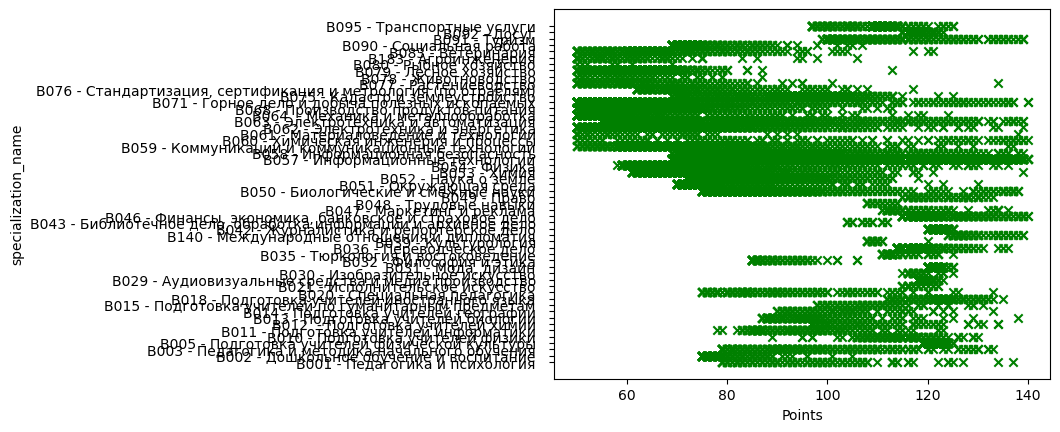

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("Points")
plt.ylabel("specialization_name")
plt.scatter(df[['Points']].values ,df['specialization_name'].values,color = 'green', marker='x')

# Specialization name Label Encoding

In [27]:
# Specialization name

categ = ['specialization_name']

# Encode Categorical Columns
le_spec = LabelEncoder()
df_encoded_spec = df[categ].apply(le_spec.fit_transform)
df[categ] = df[categ].apply(le_spec.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded_spec)
print(le_spec.classes_)

       specialization_name
0                        0
1                        0
2                        0
3                        0
4                        0
...                    ...
27663                   51
27664                   51
27665                   51
27666                   51
27667                   51

[27668 rows x 1 columns]
['B001 - Педагогика и психология  '
 'B002 - Дошкольное обучение и воспитание  '
 'B003 - Педагогика и методика начального обучения  '
 'B005 - Подготовка учителей физической культуры  '
 'B010 - Подготовка учителей физики  '
 'B011 - Подготовка учителей информатики  '
 'B012  - Подготовка учителей химии  '
 'B013 - Подготовка учителей биологии  '
 'B014 - Подготовка учителей географии  '
 'B015 - Подготовка учителей по гуманитарным предметам  '
 'B018 - Подготовка учителей иностранного языка  '
 'B020 - Специальная педагогика  ' 'B021 - Исполнительское искусство  '
 'B029 - Аудиовизуальные средства и медиа производство  '
 'B030 - Изобразите

In [28]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,City,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


# Status Label Encoding

In [29]:
df['Status'].value_counts()

City       24473
Village     3195
Name: Status, dtype: int64

In [30]:
# Status name

categ = ['Status']

# Encode Categorical Columns
le_status = LabelEncoder()
df_encoded_status = df[categ].apply(le_status.fit_transform)
df[categ] = df[categ].apply(le_status.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded_status)
print(le_status.classes_)

       Status
0           0
1           0
2           0
3           0
4           0
...       ...
27663       1
27664       1
27665       1
27666       1
27667       1

[27668 rows x 1 columns]
['City' 'Village']


In [31]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,непс,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


# Преимущественное Право Label Encoding

In [32]:
df['преимущественноеправо'].value_counts()

-           19539
мнс          5073
аб           1894
отличник      635
непс          527
Name: преимущественноеправо, dtype: int64

In [33]:
# преимущественноеправо name

categ = ['преимущественноеправо']

# Encode Categorical Columns
le_preimushestvo = LabelEncoder()
df_encoded_preimushestvo = df[categ].apply(le_preimushestvo.fit_transform)
df[categ] = df[categ].apply(le_preimushestvo.fit_transform)
# df[categ] = df[categ].apply(le.fit_transform)
                            
print(df_encoded_preimushestvo)
print(le_preimushestvo.classes_)

       преимущественноеправо
0                          3
1                          3
2                          3
3                          3
4                          3
...                      ...
27663                      2
27664                      2
27665                      2
27666                      2
27667                      2

[27668 rows x 1 columns]
['-' 'аб' 'мнс' 'непс' 'отличник']


In [34]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [35]:
# df = df.reset_index()

In [36]:
df.fillna(0)

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,315,97,13,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,316,97,32,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,317,97,42,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,318,97,27,51,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


In [37]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Training Time

In [38]:
X_df = df.copy() #df.loc[ : , 'Univer_code' : ] #'суммабалловпрофильныхпредметов(творческихэкзаменов)'

In [39]:
X_df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [40]:
Y_df = df['specialization_name']
X_df.drop(columns = ['index', 'specialization_name'],inplace = True)

In [41]:
X_df

,Points,Univer_code,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,137,13,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,134,302,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,127,13,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,125,25,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,124,302,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,97,13,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27664,97,32,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27665,97,42,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0
27666,97,27,1,97,2,3.643,57,96.0,80.0,109.0,103.0,13.0,23.0,5,2,-52.0


In [42]:
Y_df

0         0
1         0
2         0
3         0
4         0
         ..
27663    51
27664    51
27665    51
27666    51
27667    51
Name: specialization_name, Length: 27668, dtype: int32

In [43]:
x = X_df.values

In [44]:
x

array([[137.,  13.,   0., ...,   0.,   2.,  70.],
       [134., 302.,   0., ...,   0.,   2.,  70.],
       [127.,  13.,   0., ...,   0.,   2.,  70.],
       ...,
       [ 97.,  42.,   1., ...,   5.,   2., -52.],
       [ 97.,  27.,   1., ...,   5.,   2., -52.],
       [ 97.,  19.,   1., ...,   5.,   2., -52.]])

In [45]:
df.head()

,index,Points,Univer_code,specialization_name,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
0,1,137,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
1,2,134,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
2,3,127,13,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
3,4,125,25,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0
4,5,124,302,0,0,89,3,4.571,46,131.0,97.0,138.0,97.0,7.0,0.0,0,2,70.0


In [46]:
# Y_df = df['Points']
y = Y_df.values

In [47]:
y

array([ 0,  0,  0, ..., 51, 51, 51])

In [48]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state = 42) # , random_state = 42


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
x_train_stat,x_test_stat,y_train_stat,y_test_stat = train_test_split(X_df,Y_df,test_size = 0.2, random_state = 42)

In [50]:
x_test_stat.describe()

,Points,Univer_code,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,86.003433,99.016082,0.109866,72.589989,0.576617,4.026127,37.758222,121.633719,69.962956,124.968739,78.827611,3.335020,8.864655,4.023130,6.101735,135.234008
std,22.165990,156.119616,0.312751,21.877073,0.987818,0.685364,20.571618,30.174367,21.660774,29.890727,25.490615,8.547619,9.497930,2.405752,2.964813,470.873486
min,50.000000,2.000000,0.000000,50.000000,0.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-106.000000,-104.000000,0.000000,0.000000,-340.000000
25%,68.000000,16.000000,0.000000,55.000000,0.000000,3.500000,21.000000,124.000000,61.000000,124.000000,64.000000,0.000000,1.250000,2.000000,2.000000,-58.000000
50%,83.000000,29.000000,0.000000,69.000000,0.000000,4.133000,29.000000,133.000000,66.000000,138.000000,81.000000,3.000000,6.000000,5.000000,8.000000,-20.000000
75%,104.000000,57.000000,0.000000,88.000000,1.000000,4.571000,48.000000,136.000000,83.000000,140.000000,98.000000,7.000000,15.000000,5.000000,8.000000,175.000000
max,140.000000,522.000000,1.000000,124.000000,4.000000,5.000000,90.000000,140.000000,120.000000,140.000000,126.000000,41.000000,40.000000,8.000000,9.000000,1552.000000


In [51]:
X_df.describe()

,Points,Univer_code,Status,суммабалловсертификата,преимущественноеправо,среднийбаллаттестата(диплома),суммабалловпрофильныхпредметов(творческихэкзаменов),2020-2021_Max,2020-2021_Min,2021-2022_Max,2021-2022_Min,difference_Max,difference_Min,profile subject_1,profile subject_2,Count_difference_per_year
count,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000,27668.000000
mean,85.777649,96.873319,0.115476,72.375669,0.584104,4.017186,37.537155,121.341080,69.873175,124.753903,78.772553,3.412823,8.899378,4.004120,6.107995,135.218447
std,22.033588,152.733837,0.319602,21.766609,0.999680,0.686790,20.468508,30.542476,21.701030,30.106364,25.461710,8.201026,9.187414,2.405788,2.969279,472.296441
min,50.000000,2.000000,0.000000,50.000000,0.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-106.000000,-104.000000,0.000000,0.000000,-340.000000
25%,68.000000,16.000000,0.000000,55.000000,0.000000,3.429000,21.000000,122.000000,61.000000,123.000000,64.000000,0.000000,2.000000,2.000000,2.000000,-58.000000
50%,82.000000,29.000000,0.000000,69.000000,0.000000,4.071000,29.000000,133.000000,66.000000,137.000000,81.000000,3.000000,6.000000,5.000000,8.000000,-20.000000
75%,103.000000,57.000000,0.000000,88.000000,1.000000,4.571000,48.000000,136.000000,83.000000,140.000000,98.000000,7.000000,15.000000,5.000000,8.000000,175.000000
max,140.000000,522.000000,1.000000,124.000000,4.000000,5.000000,90.000000,140.000000,120.000000,140.000000,126.000000,41.000000,40.000000,8.000000,9.000000,1552.000000


# Gaussian NB

In [52]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy:1.00


In [53]:
import time
start_time = time.time()
y_pred = nb.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.11900043487548828 seconds ---


# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,pred)))

Accuracy:1.00


In [55]:
import time
start_time = time.time()
pred = lr.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007004499435424805 seconds ---


# GridSearchCV Logistic Regression

In [56]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV

# parameters = { 'dual':(False, True), 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':(True, False)
# , 'tol':[0.0001, 0.001, 0.01, 0.1]} # это гиперпараметры Logistic Regression 
# lr = LogisticRegression(max_iter=1000, penalty='l2') # это нужно чтобы закинуть внутрь GridSearchCV
# lr.get_params().keys() # гиперпараметры Logistic regression

# clf = GridSearchCV(lr, parameters) # создаем модельку GridSearchCV
# clf.fit(X_train, y_train) # Здесь закидываем данные чтобы оно тренировалось

In [57]:
# print("model score: %.3f" % clf.score(X_test, y_test)) # показывает точность модельки GridSearchCV}

# K Nearest Neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred)))

C:\Users\fazyl\anaconda3\envs\torch\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:1.00


In [59]:
import time
start_time = time.time()
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\fazyl\anaconda3\envs\torch\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


--- 3.4810006618499756 seconds ---


# SVM

In [60]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred)))

[[ 70   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   0]
 [  0   0 175 ...   0   0   0]
 ...
 [  0   0   0 ... 153   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   0   0 ...   0   0  89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00       176
           4       1.00      1.00      1.00       113
           5       1.00      1.00      1.00       128
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00       112
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        54
          10       1.00      1.00      1.00       115
          11       1.00      1.00      1.00       105
          12       0.00      0.00      0.00        11
          13       1.00      1.00      1.00        

C:\Users\fazyl\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fazyl\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fazyl\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
import time
start_time = time.time()
y_pred = clf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.82002854347229 seconds ---


# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

dtc = DecisionTreeClassifier(criterion='entropy')
kf = KFold(n_splits=5, shuffle=True)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

for criterion in ['gini', 'entropy']:
    print('Decision Tree -{}'.format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        
#         start_time = time.time()
#         y_pred = dt.predict(X_test)
#         print("--- %s seconds ---" % (time.time() - start_time))
        
        accuracy.append(accuracy_score(y_test, y_pred))
        #precision.append(precision_score(y_test, y_pred))
        #recall.append(recall_score(y_test, y_pred))
    start_time = time.time()
    y_pred = dt.predict(X_test)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    print(f'accuracy: {np.mean(accuracy)}')
    #print(f'precision: {np.mean(precision)}')
    #print(f'recall: {np.mean(recall)}')
print()

Decision Tree -gini
--- 0.002028226852416992 seconds ---
accuracy: 1.0
Decision Tree -entropy
--- 0.0010001659393310547 seconds ---
accuracy: 1.0



In [64]:
list(X_df.columns)

['Points',
 'Univer_code',
 'Status',
 'суммабалловсертификата',
 'преимущественноеправо',
 'среднийбаллаттестата(диплома)',
 'суммабалловпрофильныхпредметов(творческихэкзаменов)',
 '2020-2021_Max',
 '2020-2021_Min',
 '2021-2022_Max',
 '2021-2022_Min',
 'difference_Max',
 'difference_Min',
 'profile subject_1',
 'profile subject_2',
 'Count_difference_per_year']

In [65]:
from sklearn.tree import export_graphviz

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
from IPython.display import display

feature_names = ['Points'] # , 'Univer_code'
X = X_df[feature_names].values
y = Y_df.values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)
display(Image(filename='tree.png'))

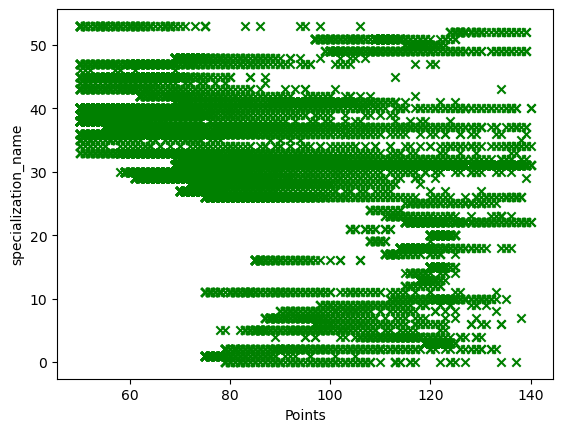

In [67]:
import matplotlib.pyplot as plt
plt.xlabel("Points")
plt.ylabel("specialization_name")
plt.scatter(df[['Points']].values ,df['specialization_name'].values,color = 'green', marker='x')

# Neural Network

In [66]:
stop

NameError: name 'stop' is not defined

In [ ]:
Y_df

In [ ]:
X_df
X_train,X_test,y_train,y_test = train_test_split(X_df, Y_df,test_size = 0.01, random_state = 1) # , random_state = 42


# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=1) #stratify=y_train,

In [ ]:
y_train

In [ ]:
list_y_train = y_train.copy()

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

In [ ]:
class ChessDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X = self.X[idx] # df.iloc[0]
        y = self.y[idx]
        return X, y

In [ ]:
train_dataset = ChessDataset(X_train, y_train)
val_dataset = ChessDataset(X_val, y_val)
test_dataset = ChessDataset(X_test, y_test)

In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    #print(t)
    
target_list = torch.tensor(target_list)

In [ ]:
len(target_list)

In [ ]:
# Y_df.value_counts()

In [ ]:
y_train

In [ ]:
li = list(Y_df.value_counts())

In [ ]:
type(li)

In [ ]:
li_list = li#.tolist()

In [ ]:
li_list_1 = list(list_y_train.value_counts())

In [ ]:
#class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(li_list_1, dtype=torch.float) 
print(class_weights)

In [ ]:
class_weights_all = class_weights[target_list]

In [ ]:
# weighted_sampler = WeightedRandomSampler(
#     weights=class_weights_all,
#     num_samples=len(class_weights_all),
#     replacement=True
# )

In [ ]:
df['Univer_code'].nunique()

In [ ]:
EPOCHS = 10
BATCH_SIZE = 2
LEARNING_RATE = 0.001 #0.0007
NUM_FEATURES = len(X_df.columns)
NUM_CLASSES = 58

In [ ]:
# train_loader = DataLoader(dataset=train_dataset,
#                           batch_size=BATCH_SIZE,
#                            sampler=weighted_sampler #shuffle = True
# )
# val_loader = DataLoader(dataset=val_dataset, batch_size=1)
# test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 256)
        self.layer_4 = nn.Linear(256, 128)
        self.layer_5 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)#nn.Dropout3d(p=0.1)#nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(256)
        self.batchnorm4 = nn.BatchNorm1d(128)
        self.batchnorm5 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_5(x)
        x = self.batchnorm5(x)
        x = self.relu(x)
        #x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
# model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
# model.to(device)

# criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# print(model)

In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:


print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0

    model.train()

    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()

     # VALIDATION    
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()

    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
        